#Import required libraries:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Load preprocessed Gait Datasets:

In [ ]:
gait_hc=pd.read_csv('/content/drive/MyDrive/Parkinsons_Model/Gait_HC.csv')
gait_pd=pd.read_csv('/content/drive/MyDrive/Parkinsons_Model/Gait_PD.csv')

#Separate Gait labels form features.

In [ ]:
gait_pd_x=gait_pd.drop(['Label'],axis=1)
gait_hc_x=gait_hc.drop(['Label'],axis=1)
gait_pd_y=gait_pd.Label
gait_hc_y=gait_hc.Label

#Split dataset for training, validation and testing purpose.

In [ ]:
from sklearn.model_selection import train_test_split
gait_pd_x_train, gait_pd_x_test, gait_pd_y_train, gait_pd_y_test = train_test_split(gait_pd_x, gait_pd_y, test_size = 0.50, random_state = 0)
gait_hc_x_train, gait_hc_x_test, gait_hc_y_train, gait_hc_y_test = train_test_split(gait_hc_x, gait_hc_y, test_size = 0.50, random_state = 0)

In [ ]:
gait_pd_x_val, gait_pd_x_test, gait_pd_y_val, gait_pd_y_test = train_test_split(gait_pd_x_test, gait_pd_y_test, test_size = 0.50, random_state = 0)
gait_hc_x_val, gait_hc_x_test, gait_hc_y_val, gait_hc_y_test = train_test_split(gait_hc_x_test, gait_hc_y_test, test_size = 0.50, random_state = 0)

#Concatenate data of both the classes.

In [ ]:
X_train = [gait_pd_x_train, gait_hc_x_train]
X_train=pd.concat(X_train)
X_test = [gait_pd_x_test, gait_hc_x_test]
X_test=pd.concat(X_test)
X_val = [gait_pd_x_val, gait_hc_x_val]
X_val=pd.concat(X_val)

In [ ]:
y_train=gait_pd_y_train.append(gait_hc_y_train)
y_test=gait_pd_y_test.append(gait_hc_y_test)
y_val=gait_pd_y_val.append(gait_hc_y_val)

<ipython-input-98-2f5128c19092>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train=gait_pd_y_train.append(gait_hc_y_train)
<ipython-input-98-2f5128c19092>:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_test=gait_pd_y_test.append(gait_hc_y_test)
<ipython-input-98-2f5128c19092>:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_val=gait_pd_y_val.append(gait_hc_y_val)


In [ ]:
np.shape(X_train)

(153, 126)

#Standardize those features : 

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_val = sc.fit_transform(X_val)

#Import another set of required libraries.

In [ ]:
from keras.models import Model
from keras.layers import Layer, Dropout, Conv2D, Dense, MaxPooling2D, Input, Flatten, Lambda
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.metrics import SparseCategoricalAccuracy

#Neural Network Architecture for basline model :

In [ ]:
model=keras.Sequential()
model.add(Input(shape=126, name="base_input"))
# model.add(Flatten(name="flatten_input"))
model.add(Dense(16, activation='relu', name="first_base_dense"))
model.add(Dropout(0.3, name="first_dropout"))
model.add(Dense(8, activation='relu', name="second_base_dense"))
model.add(Dropout(0.3, name="second_dropout"))
# model.add(Flatten(name="flatten_input"))
model.add(Dense(4, activation='relu', name="third_base_dense"))
model.add(Dense(2, activation='sigmoid'))
# model=Model(input,x)
model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = tf.keras.optimizers.RMSprop(), 
              metrics =['sparse_categorical_accuracy',
                        # tf.keras.metrics.Precision(name='precision'),
                        # tf.keras.metrics.Recall(name='recall'),
                        # tf.keras.metrics.AUC(name='auc')
                        ])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_base_dense (Dense)    (None, 16)                2032      
                                                                 
 first_dropout (Dropout)     (None, 16)                0         
                                                                 
 second_base_dense (Dense)   (None, 8)                 136       
                                                                 
 second_dropout (Dropout)    (None, 8)                 0         
                                                                 
 third_base_dense (Dense)    (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
Total params: 2,214
Trainable params: 2,214
Non-traina

#Training Process: 

In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=5,epochs=15)

Epoch 1/15
31/31 [==============================] - 1s 10ms/step - loss: 0.9517 - sparse_categorical_accuracy: 0.3268 - val_loss: 0.7522 - val_sparse_categorical_accuracy: 0.3421
Epoch 2/15
31/31 [==============================] - 0s 5ms/step - loss: 0.7944 - sparse_categorical_accuracy: 0.4248 - val_loss: 0.7035 - val_sparse_categorical_accuracy: 0.5395
Epoch 3/15
31/31 [==============================] - 0s 4ms/step - loss: 0.7429 - sparse_categorical_accuracy: 0.5490 - val_loss: 0.6842 - val_sparse_categorical_accuracy: 0.6316
Epoch 4/15
31/31 [==============================] - 0s 5ms/step - loss: 0.6646 - sparse_categorical_accuracy: 0.6601 - val_loss: 0.6674 - val_sparse_categorical_accuracy: 0.6842
Epoch 5/15
31/31 [==============================] - 0s 5ms/step - loss: 0.6401 - sparse_categorical_accuracy: 0.6797 - val_loss: 0.6427 - val_sparse_categorical_accuracy: 0.7237
Epoch 6/15
31/31 [==============================] - 0s 4ms/step - loss: 0.6194 - sparse_categorical_accuracy:

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.title('Training and Validation ' + string)
  plt.show()

#Loss and Accuracy Plot for training and validation data.

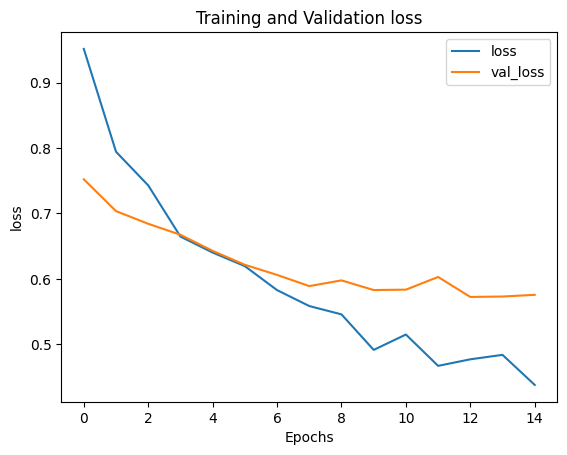

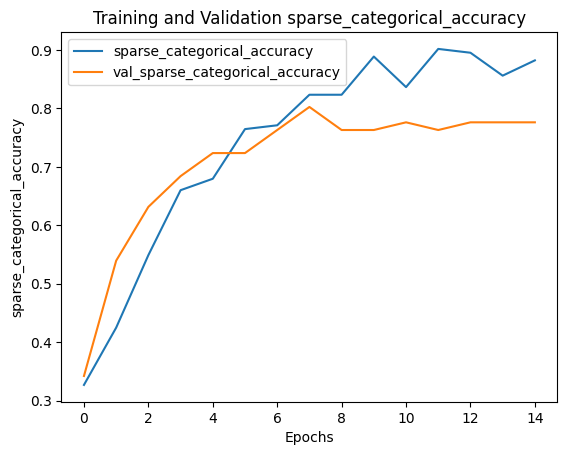

In [ ]:
plot_graphs(history, "loss")
plot_graphs(history, "sparse_categorical_accuracy")

In [ ]:
y_test.value_counts()

1    54
0    23
Name: Label, dtype: int64

In [ ]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 5ms/step


In [ ]:
import collections
# collections.Counter(y_pred)

In [ ]:
import seaborn
# plt.figure(figsize = (12,8))
# seaborn.heatmap(cm, annot=True, fmt='d')
# plt.title("Confusion Matrix for Test Data")
# plt.xlabel('Predicted')
# plt.ylabel('Expected')
# plt.show()

#Function for calculating evaluation metrices (Accuracy, ROC AUC Score, Cohen Kappa Score, Confusion Matrix, Classification Report, Precision vs Recall Plot, ROC Curve) :

In [ ]:
import seaborn
import collections
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer
def model_evaluate(model, target, testX, testy):
  y_pred = model.predict(testX)
  y_pred = (y_pred>0.5)
  y_pred = y_pred.astype(int)
  y_k=[]
  for i in y_pred:
    if(i[0]==1): y_k.append(0)
    else: y_k.append(1)
  y_pred=np.asarray(y_k)
  # print(collections.Counter(y_pred))
  # y_pred = np.argmax(y_pred, axis=1)
  # print(np.shape(y_pred),testy.shape)
  y_test = testy

  # Confusion matrix
  print('Confusion Matrix')

  cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)
  # Calculate accuracy
  cm_np = cm.numpy()
  conf_acc = accuracy_score(y_test, y_pred) * 100
  print("Accuracy for Test Data = ", conf_acc)

  plt.figure(figsize = (6,4))
  seaborn.heatmap(cm, annot=True, fmt='d')
  plt.title("Confusion Matrix for Test Data")
  plt.xlabel('Predicted')
  plt.ylabel('Expected')
  plt.show()

  # Classification Report
  print('\nClassification Report')
  print(classification_report(y_test, y_pred))

  # Cohen Kappa Score
  print('\nCohen Kappa Score')
  print(cohen_kappa_score(y_test, y_pred))

  # Precision vs Recall Curve
  print('\nPrecision vs Recall Curve')
  fig, c_ax = plt.subplots(1,1, figsize = (6, 4))

  y_test = tf.keras.utils.to_categorical(y_test)
  y_pred = tf.keras.utils.to_categorical(y_pred)
  n_classes = 2

  precision = dict()
  recall = dict()

  for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                          y_pred[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
      
  plt.xlabel("recall")
  plt.ylabel("precision")
  plt.legend(loc="best")
  plt.title("Precision vs. Recall curve")
  plt.show()

  # ROC Curve
  print('\nROC Curve')
  average = 'macro'
  fig, c_ax = plt.subplots(1,1, figsize = (6, 4))
  for (idx, c_label) in enumerate(target):
      fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
      c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
  c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
  print('ROC AUC score:', roc_auc_score(y_test, y_pred, average=average))

  c_ax.legend()
  c_ax.set_xlabel('False Positive Rate')
  c_ax.set_ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.show()

#Rsults of all the evaluation metrices.

3/3 [==============================] - 0s 4ms/step
Confusion Matrix
Accuracy for Test Data =  89.6103896103896


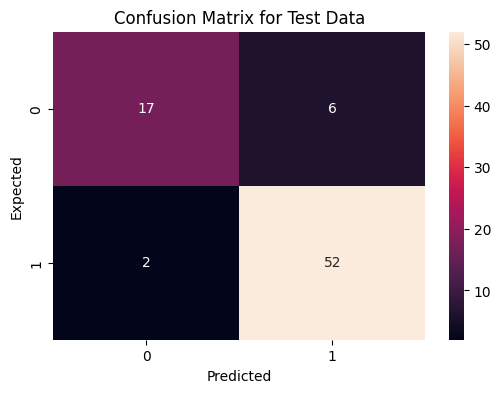


Classification Report
              precision    recall  f1-score   support

           0       0.89      0.74      0.81        23
           1       0.90      0.96      0.93        54

    accuracy                           0.90        77
   macro avg       0.90      0.85      0.87        77
weighted avg       0.90      0.90      0.89        77


Cohen Kappa Score
0.7389830508474576

Precision vs Recall Curve


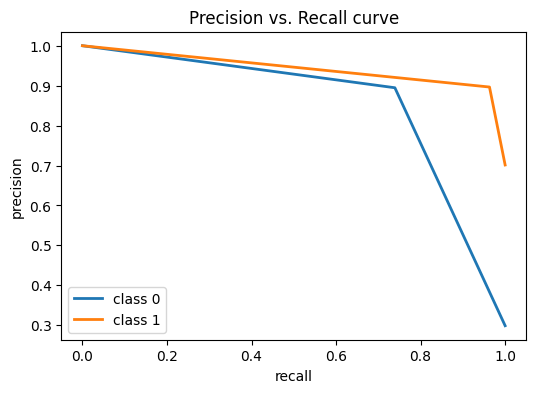


ROC Curve
ROC AUC score: 0.8510466988727858


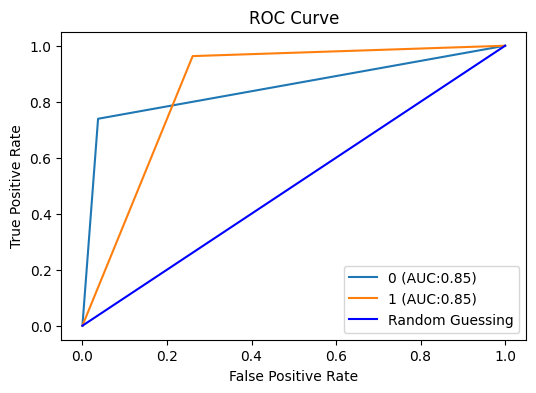

In [ ]:
model_evaluate(model, [0,1], X_test, y_test)

#Model save and model load step:

In [ ]:
# model.save("/content/drive/MyDrive/Parkinsons_Model/Siamese_Gait_Model2.h5")
print("Siamese Gait Model saved Successfully!")
Gait_model = tf.keras.models.load_model("/content/drive/MyDrive/Parkinsons_Model/Siamese_Gait_Model2.h5")

Siamese Gait Model saved Successfully!


In [ ]:
Gait_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_base_dense (Dense)    (None, 16)                2032      
                                                                 
 first_dropout (Dropout)     (None, 16)                0         
                                                                 
 second_base_dense (Dense)   (None, 8)                 136       
                                                                 
 second_dropout (Dropout)    (None, 8)                 0         
                                                                 
 third_base_dense (Dense)    (None, 4)                 36        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 2,209
Trainable params: 2,209
Non-train

In [ ]:
new_model =Model(Gait_model.input, Gait_model.layers[-2].output)
new_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base_input (InputLayer)     [(None, 126)]             0         
                                                                 
 first_base_dense (Dense)    (None, 16)                2032      
                                                                 
 first_dropout (Dropout)     (None, 16)                0         
                                                                 
 second_base_dense (Dense)   (None, 8)                 136       
                                                                 
 second_dropout (Dropout)    (None, 8)                 0         
                                                                 
 third_base_dense (Dense)    (None, 4)                 36        
                                                                 
Total params: 2,204
Trainable params: 2,204
Non-trainable p